In [6]:
import pyhdfs
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# 讀取本地CSV檔
def local_csv(df):
    # 將date欄位轉 str，並將/替換-，統一時間格式
    df['date'] = df['date'].astype(str).str.replace("/","-")
    # 判斷是否需進行民國轉西元
    len_date = len(df['date'].values[0].split("-")[0])
    if len_date==4:
        pass
    else:
        df['date'] = df['date'].apply(lambda data: str(int(data[0:3])+1911)+season(data[3:]))
    return df

In [114]:
df = pd.read_csv('1101_selected_stock.csv')
df_1101 = local_csv(df)
df_1101 = df_1101.set_index(['date'])
df_1101

,open,high,low,close,adj close,volume,slowk,slowd,macd,macdsignal,...,wma_25,sma_50,ema_50,wma_50,sma_60,ema_60,wma_60,sma_300,ema_300,wma_300
date,,,,,,,,,,,,,,,,,,,,,
2000-1-4,17.805401,18.226801,17.805401,18.226801,7.236699,9.716852e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-5,17.858000,19.174999,17.858000,18.700899,7.424934,1.499260e+11,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-6,18.542900,18.753599,17.752701,17.910700,7.111196,7.448073e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-7,17.173201,17.963400,16.857100,17.858000,7.090272,8.759947e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-10,17.910700,18.542900,17.647301,18.437500,7.320355,7.871879e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-8-4,44.950001,45.650002,44.950001,45.400002,45.400002,2.088774e+07,64.896620,63.157775,0.346311,0.413200,...,45.062923,43.956,44.092644,44.442157,43.7600,43.885337,44.258579,41.686636,41.340776,42.275368
2020-8-5,45.599998,46.650002,45.599998,46.450001,46.450001,4.054277e+07,77.195691,67.902025,0.432534,0.417067,...,45.183846,44.032,44.185090,44.539961,43.8150,43.969424,44.346776,41.712044,41.374724,42.307018
2020-8-6,46.950001,47.150002,46.500000,47.150002,47.150002,3.407786e+07,92.433767,78.175359,0.551000,0.443853,...,45.348308,44.115,44.301361,44.662235,43.8850,44.073705,44.456120,41.739161,41.413098,42.343151


In [290]:
df_new=pd.DataFrame()
df_new['close'] = df_1101['close']
df_new['3d'] = df_new['close'].iloc[2]
df_new

,close,3d
2000-1-4,18.226801,17.9107
2000-1-5,18.700899,17.9107
2000-1-6,17.910700,17.9107
2000-1-7,17.858000,17.9107
2000-1-10,18.437500,17.9107
...,...,...
2020-8-4,45.400002,17.9107
2020-8-5,46.450001,17.9107
2020-8-6,47.150002,17.9107
2020-8-7,47.099998,17.9107


In [376]:
df_new=pd.DataFrame()
df_new['close'] = df_1101['close']
df_new['3D']=df_new.rolling(3,min_periods=1).mean()
df_new

,close,3D
2000-1-4,18.226801,18.226801
2000-1-5,18.700899,18.463850
2000-1-6,17.910700,18.279467
2000-1-7,17.858000,18.156533
2000-1-10,18.437500,18.068733
...,...,...
2020-8-4,45.400002,45.116668
2020-8-5,46.450001,45.600001
2020-8-6,47.150002,46.333335
2020-8-7,47.099998,46.900000


In [377]:
''''

比較當日收盤價與3日移動平均線
當日收盤價 > 3日移動平均線 --> 買進
當日收盤價 < 3日移動平均線 --> 賣出

'''

buy=[]
sell=[]
count=-1 #計數初始值
for i in range(len(df_new)):
    # 當日收盤價大於3日MA。則買進(buy放收盤價,sell放nan)並計1
    if df_new['close'][i]>df_new['3D'][i]:
        sell.append(np.nan)
        if True:
            buy.append(df_new['close'][i])
            count = 1
        else:
            buy.append(np.nan)
    # 當日收盤價小於3日MA，若之前有買進，則賣出(buy放nan,sell放收盤價)。並計0   
    elif df_new['close'][i]<df_new['3D'][i]:
        buy.append(np.nan) 
        if count != 0:
            sell.append(df_new['close'][i])
            count = 0
        else:
            sell.append(np.nan)
    # 當日收盤價等於3日MA，啥都不做
    else:
        buy.append(np.nan)
        sell.append(np.nan)
print(len(buy))
print(len(sell))
df_new['buy'] = buy
df_new['sell'] = sell
df_new = df_new['2019-9-2':]
df_new

5044
5044


,close,3D,buy,sell
2019-9-2,38.250000,38.166667,38.250000,NaN
2019-9-3,38.349998,38.350000,NaN,38.349998
2019-9-4,38.450001,38.350000,38.450001,NaN
2019-9-5,39.000000,38.600000,39.000000,NaN
2019-9-6,39.849998,39.100000,39.849998,NaN
...,...,...,...,...
2020-8-4,45.400002,45.116668,45.400002,NaN
2020-8-5,46.450001,45.600001,46.450001,NaN
2020-8-6,47.150002,46.333335,47.150002,NaN
2020-8-7,47.099998,46.900000,47.099998,NaN


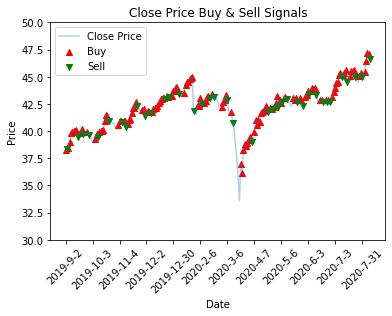

In [378]:
import matplotlib.ticker as ticker

# x軸間隔
tick_spacing = 20
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#視覺化 buy and sell 
plt.scatter(df_new.index,df_new['buy'],color='red', label='Buy',marker='^',alpha=1)
plt.scatter(df_new.index,df_new['sell'],color='green', label='Sell',marker='v',alpha=1)
plt.plot(df_new['close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.ylim(30, 50)
plt.show()

In [579]:
'''

確認10天後全部賣出，是否會賺 (大於0)? 
tatol 欄位內為 (10天內的買進總和 - 賣出總和) - 當日收盤價*剩餘股數

'''
df_tatol = df_new.copy()

# 當日收盤價*剩餘股數
re = (df_tatol['buy'].rolling(2).count()-df_tatol['sell'].rolling(2).count())*df_tatol['close']

# 賣出總額 - 買進總額 - 當日收盤價*剩餘股數
#print(df_tatol['buy'].fillna(0).rolling(3, min_periods=1).apply(lambda x: x[0]).notnull())

def ss(x):
    return x

df_tatol['tatol'] = df_tatol['buy'].fillna(0).rolling(2, min_periods=1).fillna(value=0).astype(float)
#df_tatol['tatol'] = df_tatol['sell'].fillna(0).rolling(2, min_periods=1).sum()-df_tatol['buy'].fillna(0).rolling(2, min_periods=1).sum()+re
# if df_tatol['buy'].fillna(0).rolling(2, min_periods=1).apply(lambda x : x[0]).any()==np.nan:
#     df_tatol['tatol'] = 100
# else:
#     df_tatol['tatol'] = df_tatol['sell'].fillna(0).rolling(2, min_periods=1).sum()-df_tatol['buy'].fillna(0).rolling(2, min_periods=1).sum()+re
df_tatol['2019-9-16':'2019-9-27']

AttributeError: 'Rolling' object has no attribute 'fillna'

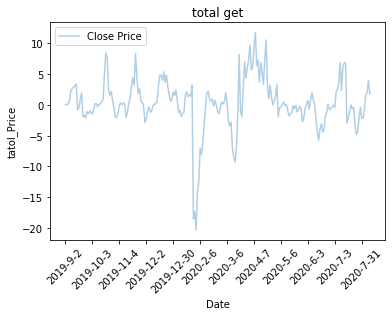

In [400]:
import matplotlib.ticker as ticker

# x軸間隔
tick_spacing = 20
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#視覺化 buy and sell 
plt.plot(df_tatol['tatol'], label='Close Price', alpha=0.35)
plt.title('total get')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('tatol_Price')
plt.legend(loc='upper left')
plt.show()